In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Conducting exploratory analysis on engine data
df = pd.read_csv("./CMaps/train_FD001.txt", delimiter=' ')

In [3]:
# Opening of data reveals that there is no data labels so I am naming them here
column_names = ["unit_number","cycle_number","operational_setting_1","operational_setting_2","operational_setting_3"]
print(len(df.columns))
# The rest of the columns are sensor measurements, let's label the remaining by an index 
for k in range(1,len(df.columns)-len(column_names)+1):
    column_names.append("sensor_measurement_{}".format(k))

df.columns = column_names

28


In [4]:
df.head()

unit_number  cycle_number  operational_setting_1  operational_setting_2  \
0            1             2                 0.0019                -0.0003   
1            1             3                -0.0043                 0.0003   
2            1             4                 0.0007                 0.0000   
3            1             5                -0.0019                -0.0002   
4            1             6                -0.0043                -0.0001   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                518.67                642.15   
1                  100.0                518.67                642.35   
2                  100.0                518.67                642.35   
3                  100.0                518.67                642.37   
4                  100.0                518.67                642.10   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0               1591.82               1403.14                 14.62  ...   
1               1587.99               1404.20                 14.62  ...   
2               1582.79               1401.87                 14.62  ...   
3               1582.85               1406.22                 14.62  ...   
4               1584.47               1398.37                 14.62  ...   

   sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  \
0                8131.49                 8.4318                   0.03   
1                8133.23                 8.4178                   0.03   
2                8133.83                 8.3682                   0.03   
3                8133.80                 8.4294                   0.03   
4                8132.85                 8.4108                   0.03   

   sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  \
0                    392                   2388                  100.0   
1                    390                   2388                  100.0   
2                    392                   2388                  100.0   
3                    393                   2388                  100.0   
4                    391                   2388                  100.0   

   sensor_measurement_20  sensor_measurement_21  sensor_measurement_22  \
0                  39.00                23.4236                    NaN   
1                  38.95                23.3442                    NaN   
2                  38.88                23.3739                    NaN   
3                  38.90                23.4044                    NaN   
4                  38.98                23.3669                    NaN   

   sensor_measurement_23  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 28 columns]

In [5]:
# How many engines are in this dataset?
len(df["unit_number"].unique())

100

In [6]:
# What is the longest and shortest suriving engines?
print("Max Cycle length: {}".format(max(df["cycle_number"])))

Max Cycle length: 362


In [7]:
# Which engine is this? looks like Unit 69, we can use this as a benchmark for normal range of operating sensor values
df.loc[df["cycle_number"]==362]

unit_number  cycle_number  operational_setting_1  \
13991           69           362                 0.0007   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
13991                   -0.0                  100.0                518.67   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
13991                643.75               1598.16               1428.28   

       sensor_measurement_5  ...  sensor_measurement_14  \
13991                 14.62  ...                8124.27   

       sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  \
13991                 8.5126                   0.03                    397   

       sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  \
13991                   2388                  100.0                  38.42   

       sensor_measurement_21  sensor_measurement_22  sensor_measurement_23  
13991                22.9782                    NaN                    NaN  

[1 rows x 28 columns]

In [41]:
# Grouping dataset by unit number, and finding the max cycles per unit
df_units = df.groupby("unit_number")['cycle_number'].max().reset_index() # Converts the series to a df

max_cycles = df_units["cycle_number"].max()
min_cycles = df_units["cycle_number"].min()

# What is are the longest and shortest lived units
print(f"{'Unit with max_cycles':30} Unit with min cycles")
print(f"{max_cycles:<30} {min_cycles}")

Unit with max_cycles           Unit with min cycles
362                            128


In [42]:
# Lets add a threshold to ID healthy engines vs unhealthy from the start
df_units = df_units.sort_values(by="cycle_number", ascending=False)
df_units['Above_Threshold'] = df_units['cycle_number'] > 200
df_units

unit_number  cycle_number  Above_Threshold
68           69           362             True
91           92           341             True
95           96           336             True
66           67           313             True
82           83           293             True
..          ...           ...              ...
23           24           147            False
56           57           137            False
69           70           137            False
90           91           135            False
38           39           128            False

[100 rows x 3 columns]

<Axes: xlabel='unit_number', ylabel='cycle_number'>

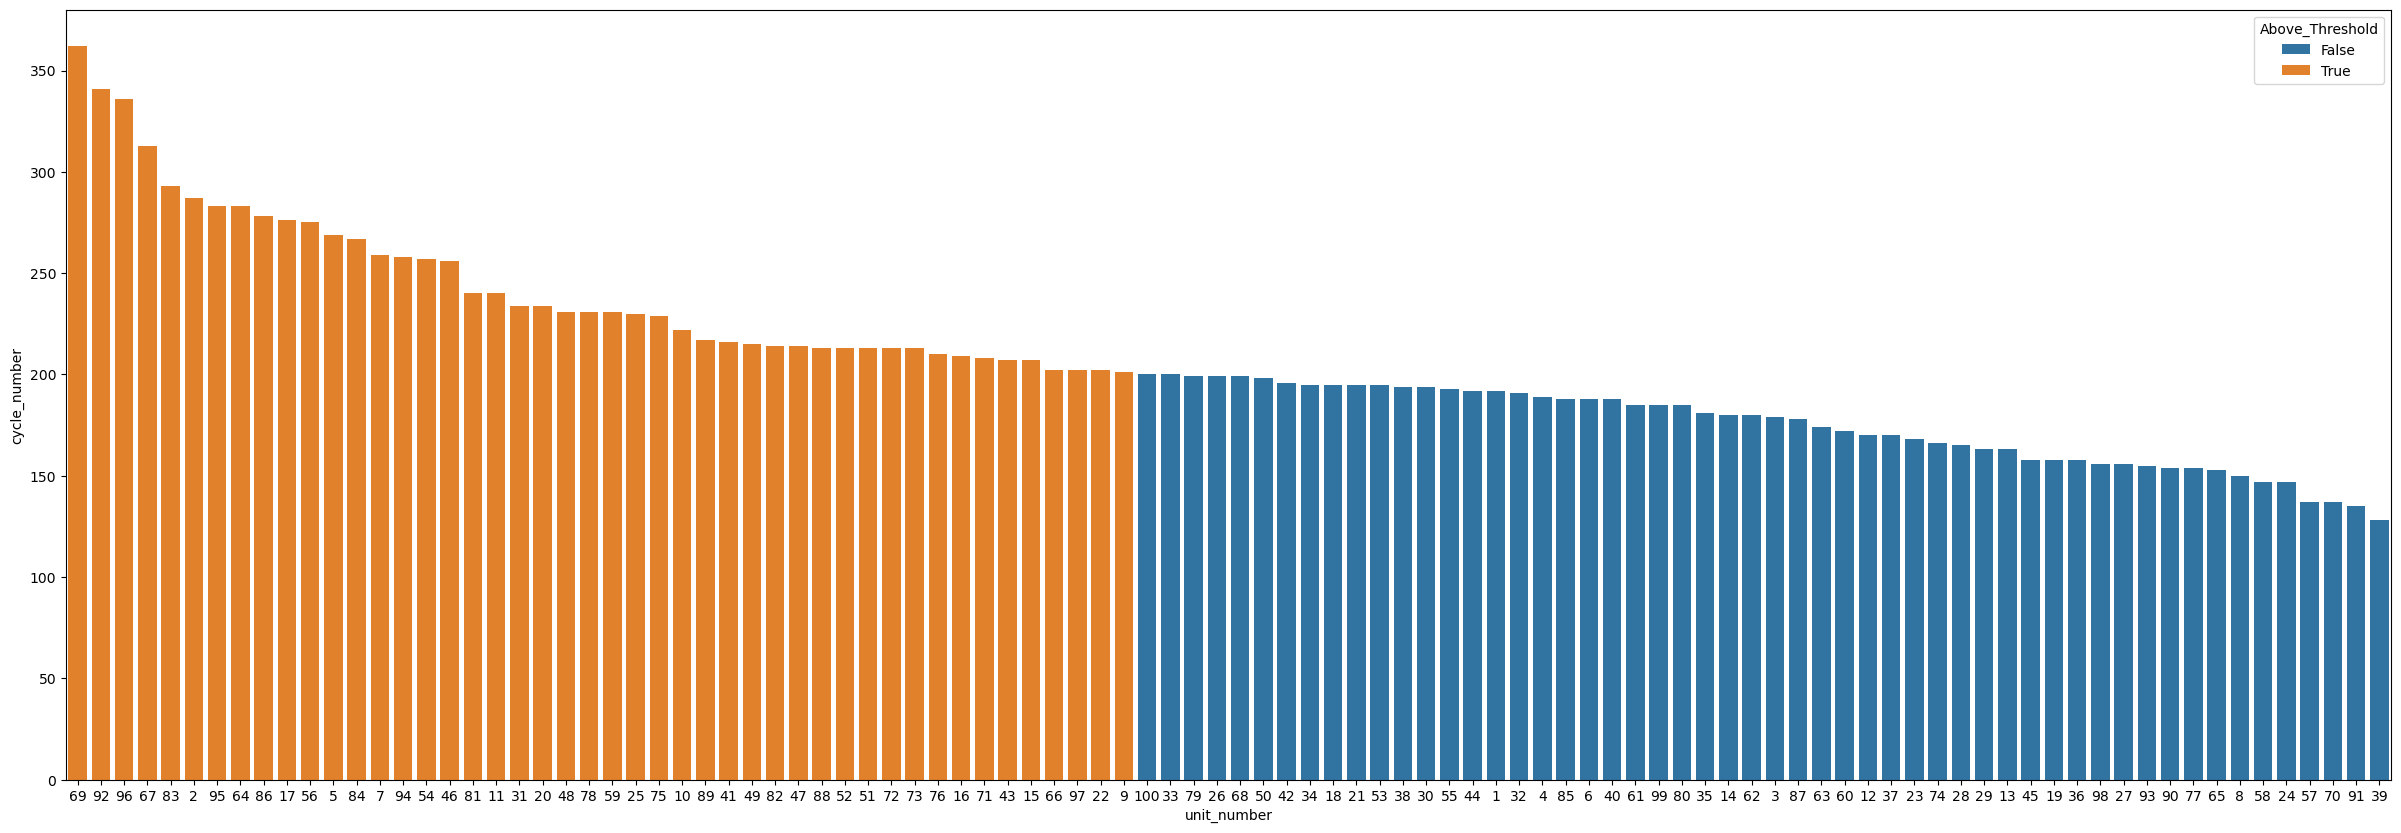

In [45]:
# Make a bar plot of the max cycles of each engine
plt.figure(figsize=(30,10))
sorted_by_cycle = df_series.sort_values(by="cycle_number", ascending=False)["unit_number"].values
# sns.barplot(data=df_series, x="unit_number", y="cycle_number", hue="Above_Threshold")
sns.barplot(data=df_series, x="unit_number", y="cycle_number", hue="Above_Threshold", order=sorted_by_cycle)

In [11]:
# Let's take a look at the data, we know we have the same characteristics for multiple engines, so let's make a FacetGrid in seaborn
# Let's chunk the plots in groups of 5 
# increment = 5
# for index, section in enumerate(np.arange(5,105,increment)):
#     print(section)
#     g = sns.FacetGrid(df[(df["unit_number"]>(section-increment)) & (df["unit_number"]<=section)], col="unit_number",sharex=True)
#     g.map(sns.lineplot, "cycle_number", "operational_setting_1")
#     # g.map(sns.lineplot, "cycle_number", "sensor_measurement_20")
#     plt.show()
    
# Unit 39 dies the earliest, why?
# Units 67 and 96 are very long-lasting, why?

In [12]:
# Let's make sure that I am selecting the correct data
long_short_living_units = df[(df["unit_number"]==69) | (df["unit_number"]==39) ]
print("Units in this dataset: {}".format( long_short_living_units["unit_number"].unique()))
long_short_living_units.head()

Units in this dataset: [39 69]


unit_number  cycle_number  operational_setting_1  operational_setting_2  \
7509           39             1                -0.0004                -0.0002   
7510           39             2                -0.0062                 0.0002   
7511           39             3                 0.0007                -0.0000   
7512           39             4                -0.0039                 0.0005   
7513           39             5                 0.0039                 0.0002   

      operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
7509                  100.0                518.67                642.72   
7510                  100.0                518.67                642.61   
7511                  100.0                518.67                642.26   
7512                  100.0                518.67                642.46   
7513                  100.0                518.67                642.31   

      sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
7509               1592.37               1410.00                 14.62  ...   
7510               1586.25               1407.99                 14.62  ...   
7511               1586.25               1407.48                 14.62  ...   
7512               1587.90               1405.23                 14.62  ...   
7513               1587.08               1408.78                 14.62  ...   

      sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  \
7509                8133.27                 8.4451                   0.03   
7510                8126.00                 8.4279                   0.03   
7511                8123.32                 8.4143                   0.03   
7512                8123.19                 8.4599                   0.03   
7513                8125.88                 8.4607                   0.03   

      sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  \
7509                    392                   2388                  100.0   
7510                    395                   2388                  100.0   
7511                    394                   2388                  100.0   
7512                    394                   2388                  100.0   
7513                    394                   2388                  100.0   

      sensor_measurement_20  sensor_measurement_21  sensor_measurement_22  \
7509                  38.90                23.2947                    NaN   
7510                  38.82                23.4604                    NaN   
7511                  38.73                23.2669                    NaN   
7512                  38.82                23.3789                    NaN   
7513                  38.73                23.3338                    NaN   

      sensor_measurement_23  
7509                    NaN  
7510                    NaN  
7511                    NaN  
7512                    NaN  
7513                    NaN  

[5 rows x 28 columns]

In [13]:
longest_cycles = long_short_living_units[long_short_living_units["unit_number"]==69]["cycle_number"].max()
shortest_cycles = long_short_living_units[long_short_living_units["unit_number"]==39]["cycle_number"].max()
print("Min cycles: {} and Max cycles: {}".format(shortest_cycles, longest_cycles))

Min cycles: 128 and Max cycles: 362


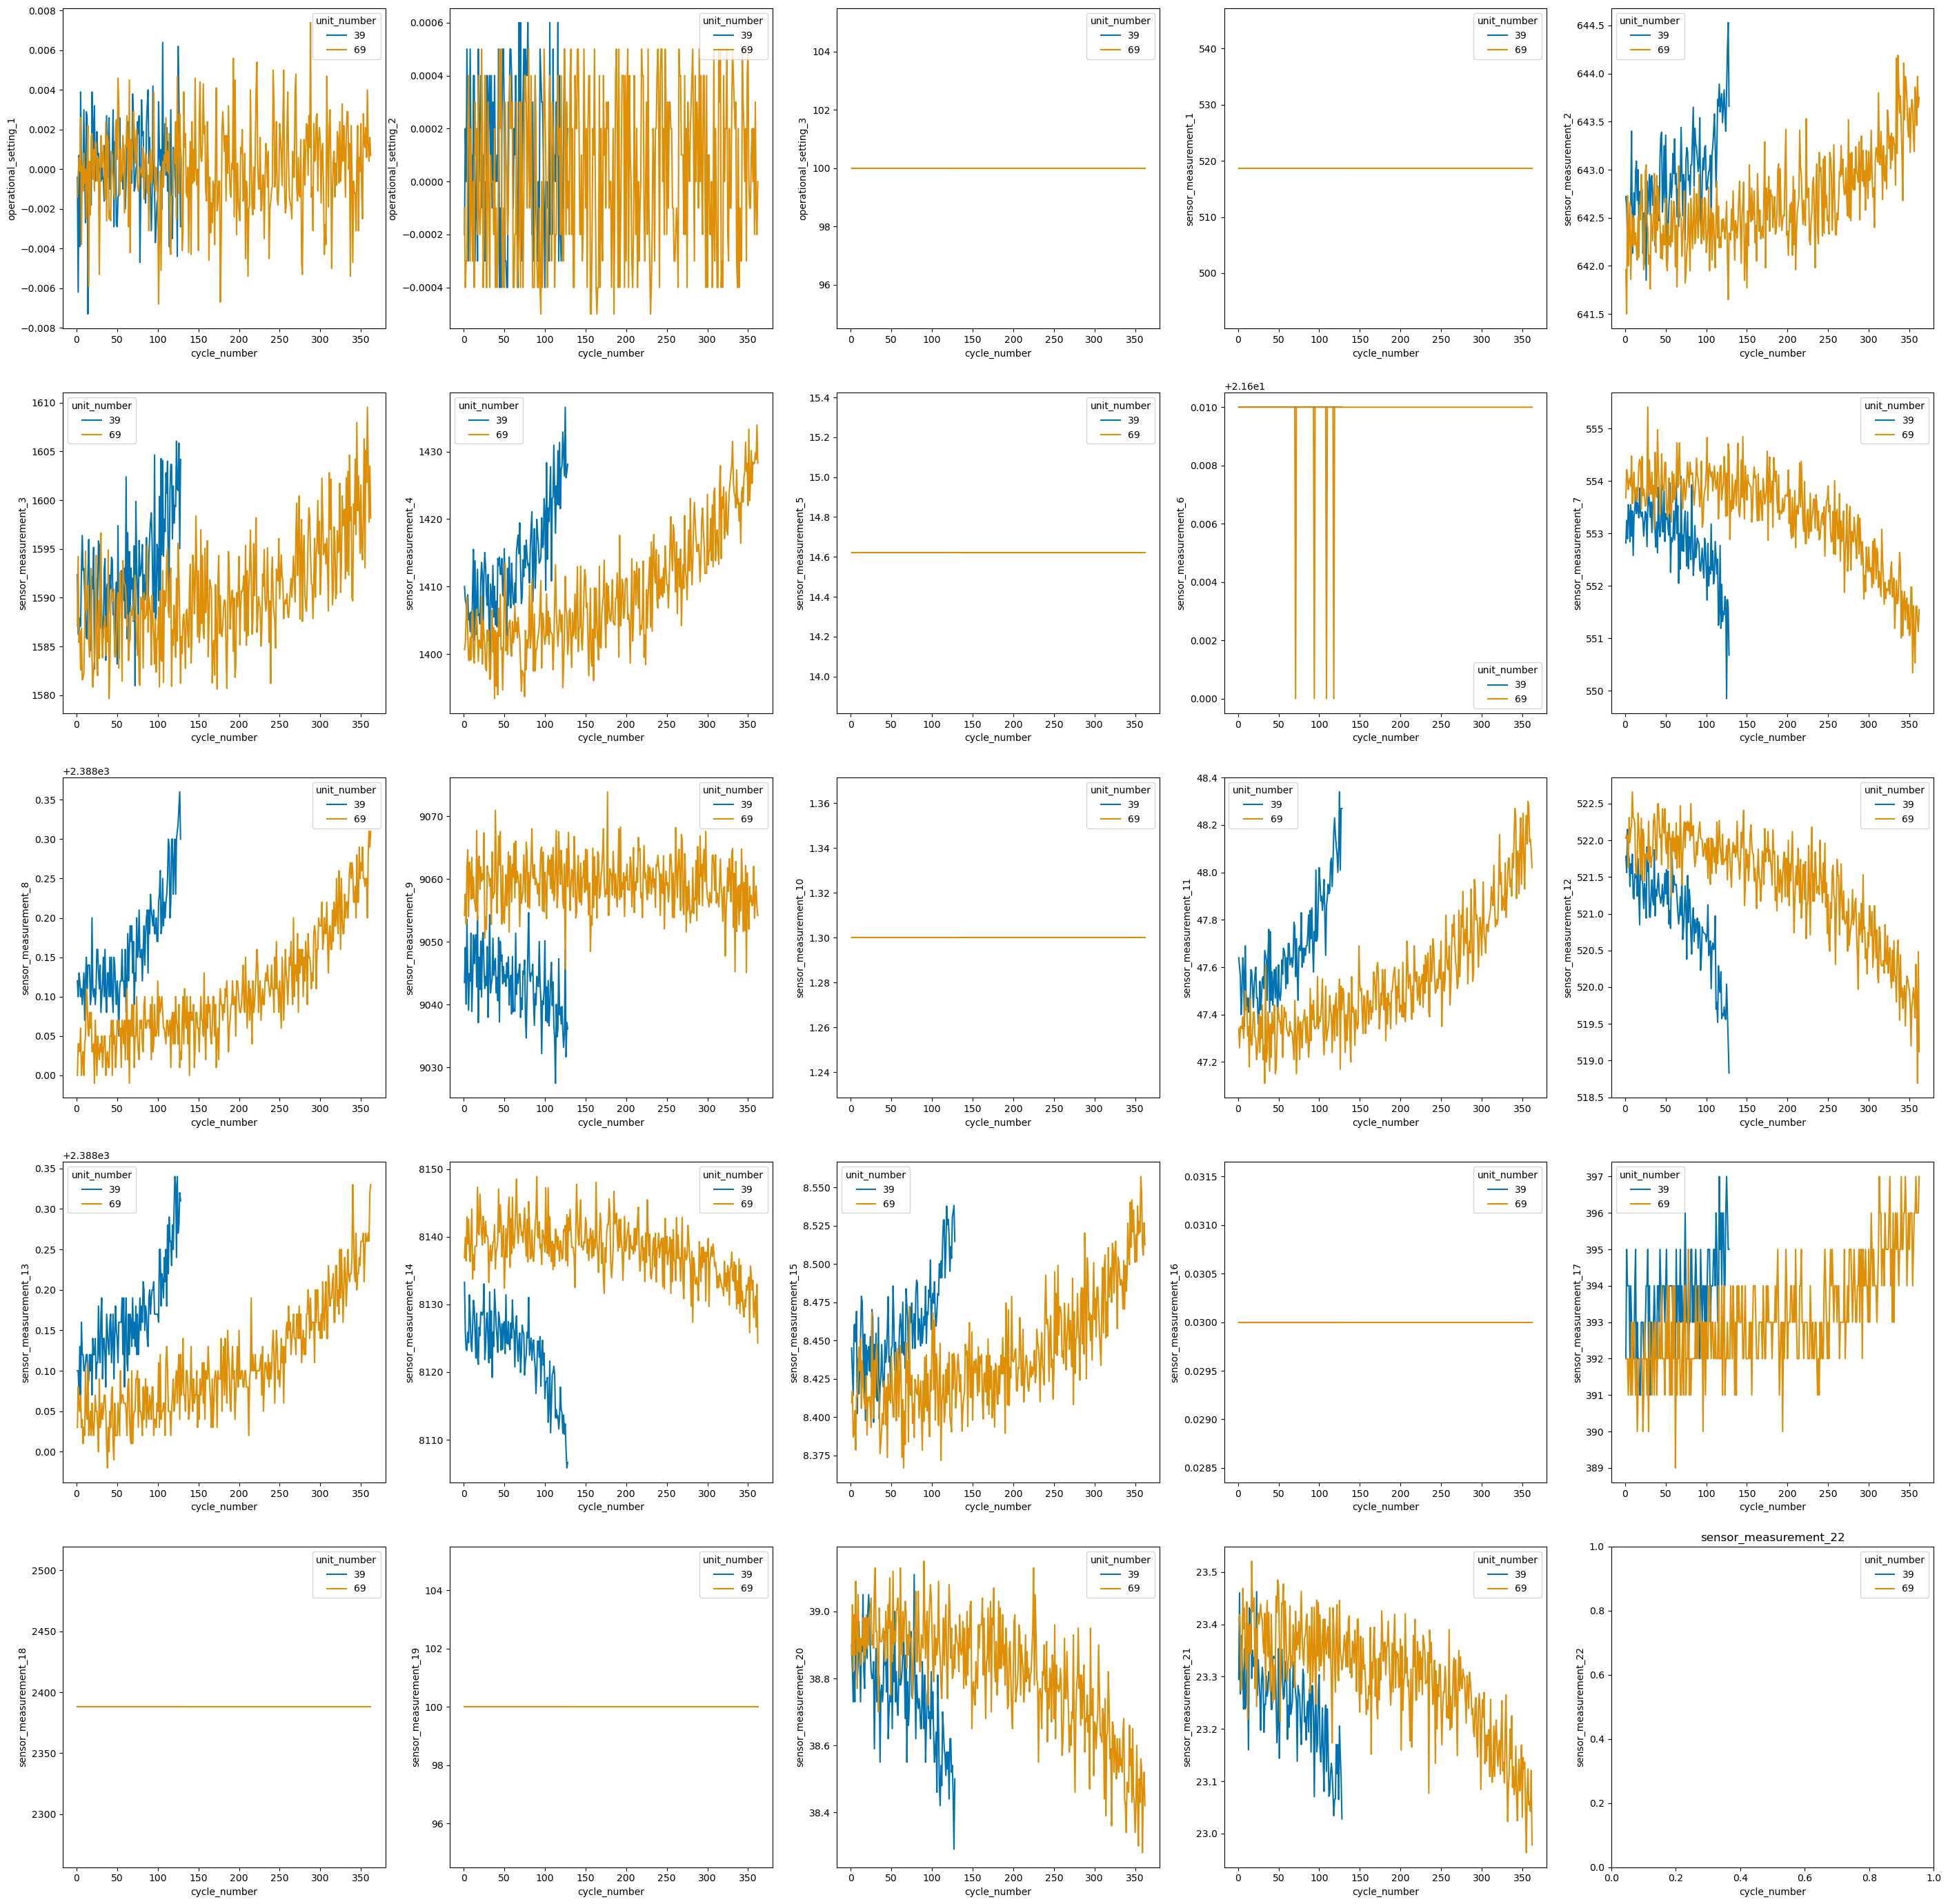

In [14]:
# Let's take a look at the sensor data for units 69 and 39 which are the longest and shortest living units

# There are 26 sensors, 24 with meaningful data so let's make a 5 by 5 grid, the last 2 are NAN plots anyway
fig, axes = plt.subplots(5, 5, figsize=(35, 35))
# fig.suptitle("Longest vs Shortest living engine")
for var, ax in zip(list(df.columns)[2:], axes.flat):
    # print(var)
    sns.lineplot(data = long_short_living_units , x = "cycle_number", y = var, hue=long_short_living_units["unit_number"], 
                 palette="colorblind",
                 ax=ax
                )
    plt.title(var)

# Ok so, I guess it makes sense that the sensor data is VERY different between the two

# Assessing the sensor data

Based off of the time series distributions of the sensors, there are a number that remain constant throughout the life of the engine, maybe remove them? These are sensors 1, 5, 10, 16, 18, 19, 22 and 23

In [13]:
df.drop(["operational_setting_3",
            "sensor_measurement_1", 
              "sensor_measurement_5",
              "sensor_measurement_6",
              "sensor_measurement_10", 
              "sensor_measurement_16",
              "sensor_measurement_18",
              "sensor_measurement_19", 
              "sensor_measurement_22",
              "sensor_measurement_23"], axis=1, inplace=True)

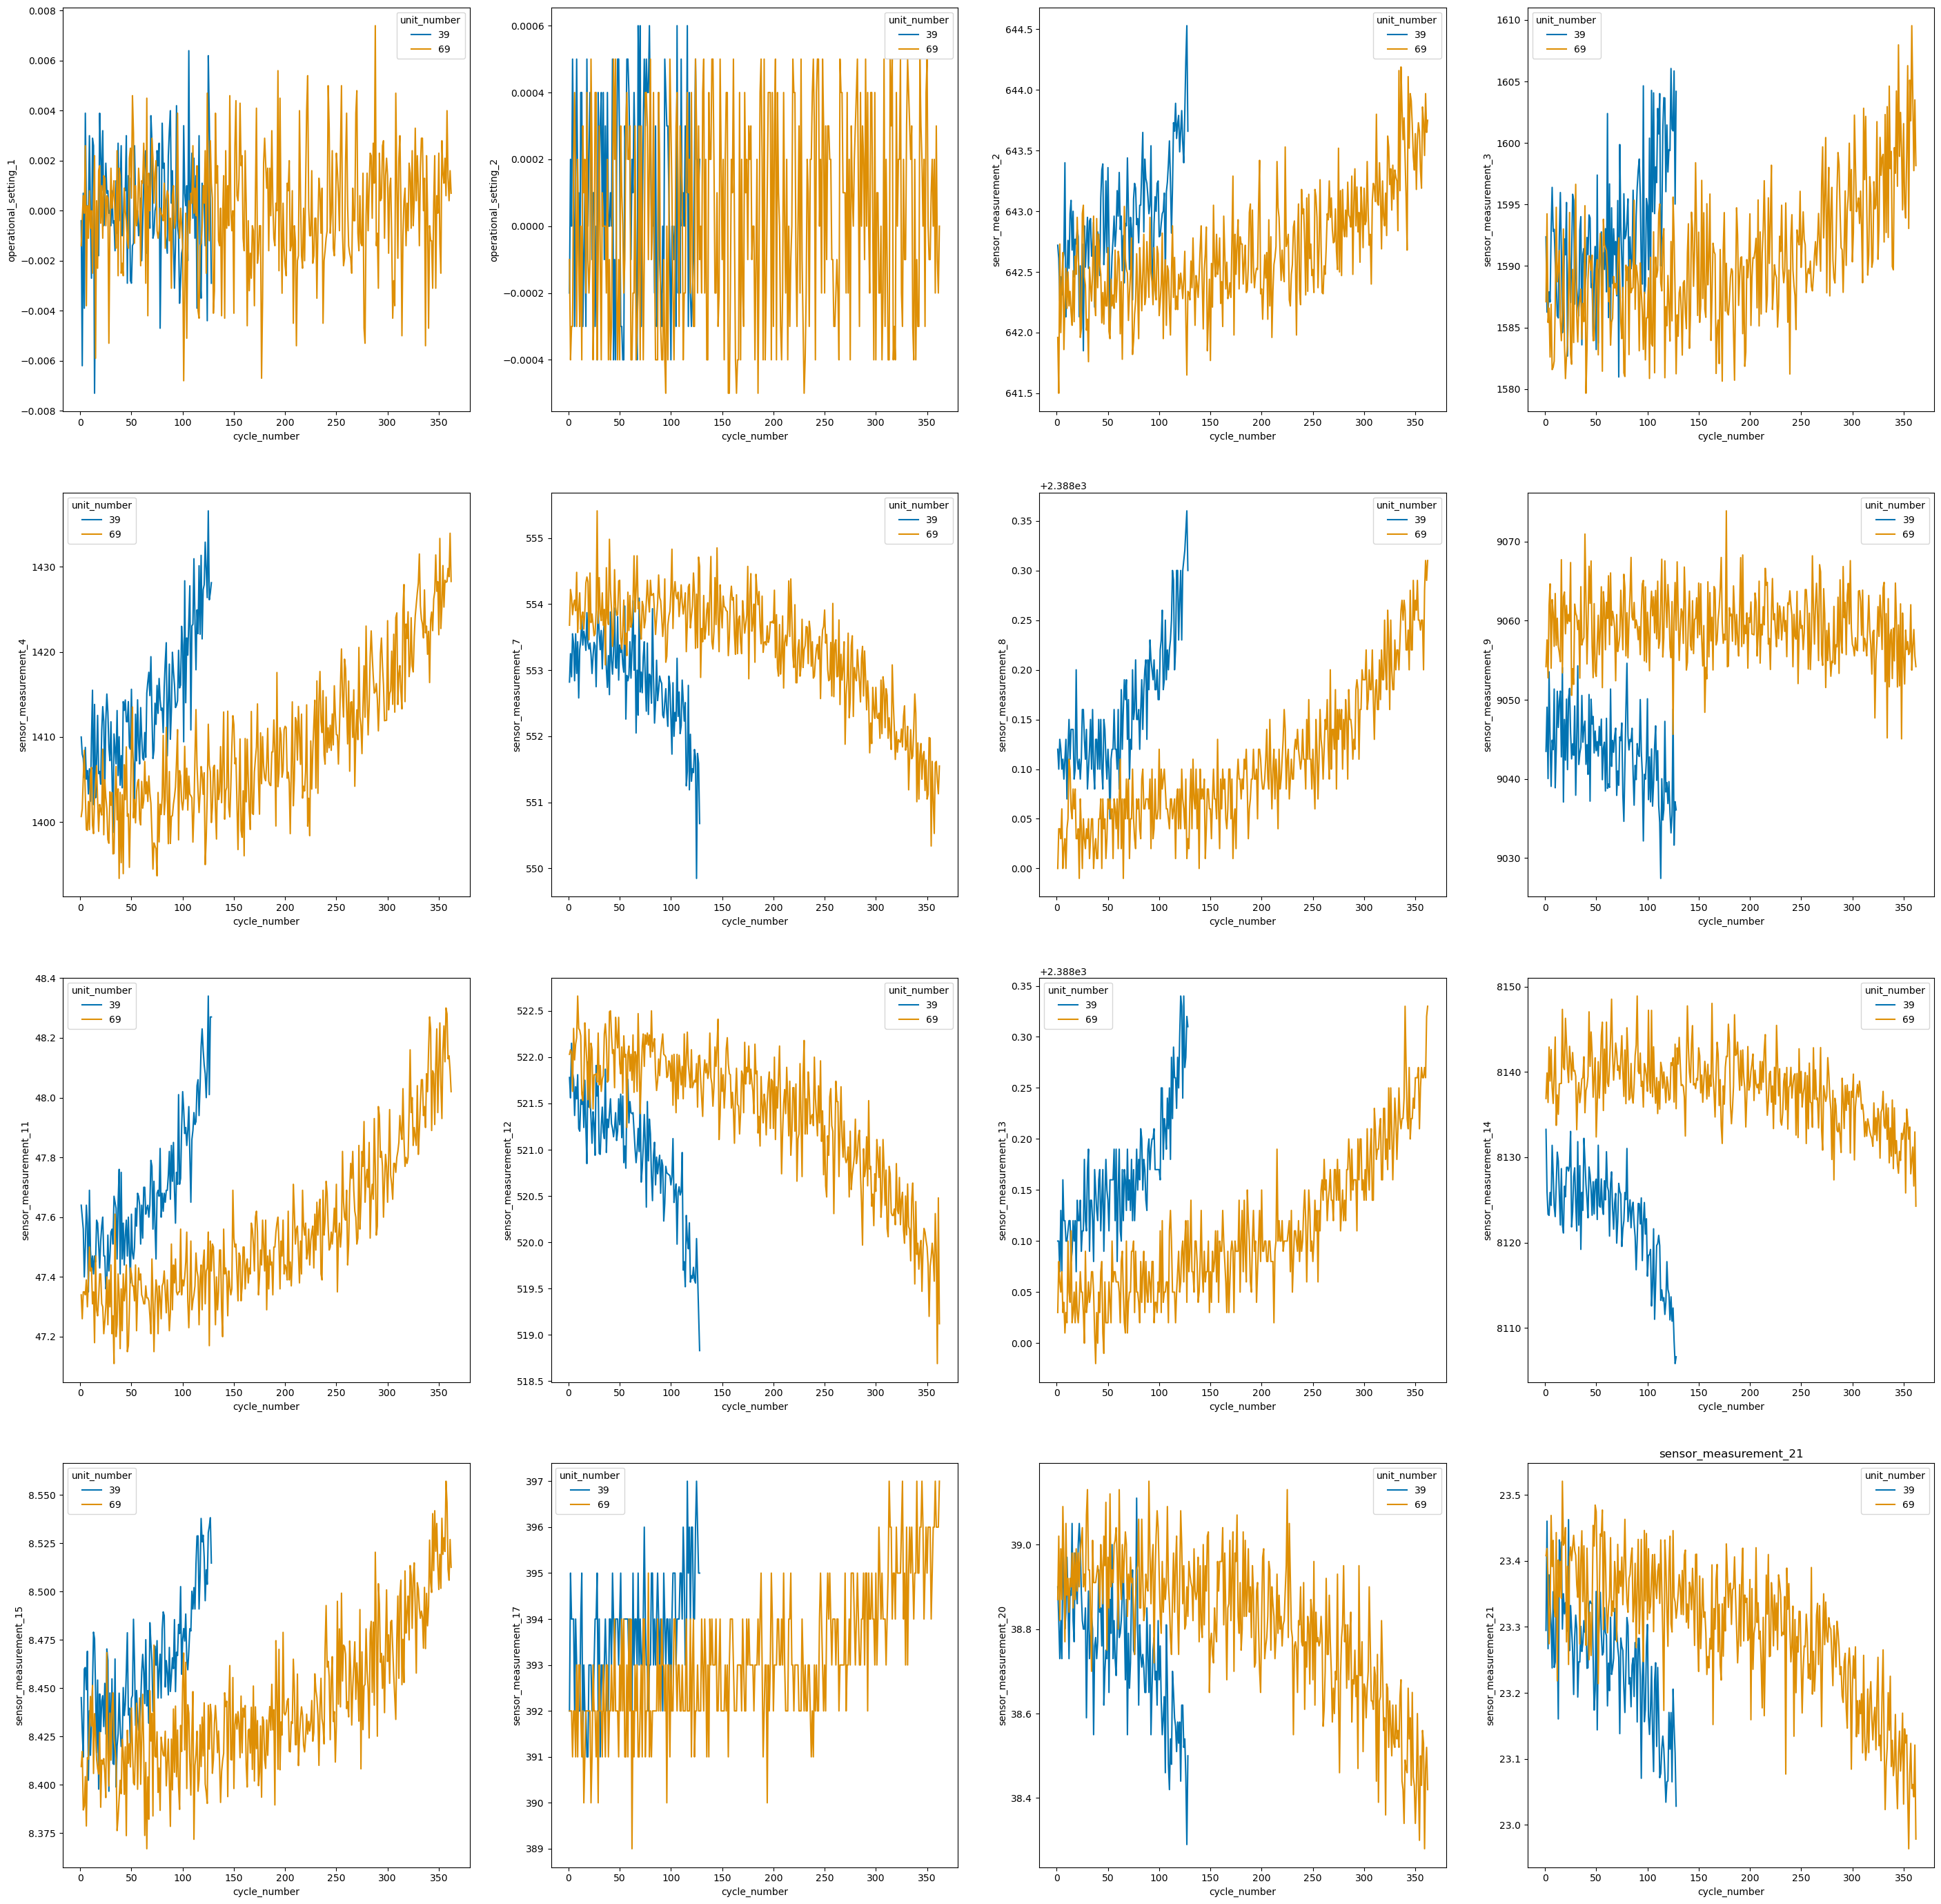

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(35, 35))
# fig.suptitle("Longest vs Shortest living engine")
for var, ax in zip(list(df.columns)[2:], axes.flat):
    # print(var)
    sns.lineplot(data = long_short_living_units , x = "cycle_number", y = var, hue=long_short_living_units["unit_number"], 
                 palette="colorblind",
                 ax=ax
                )
    plt.title(var)


# Understanding feature correlations

Although we have removed a number of featuers that would not seem to contribute to identifying the jet engine's remaining useful life. I would like to understand the correlations between the features to see weather I could further reduce the number of variables needed to produce a robust algorithm

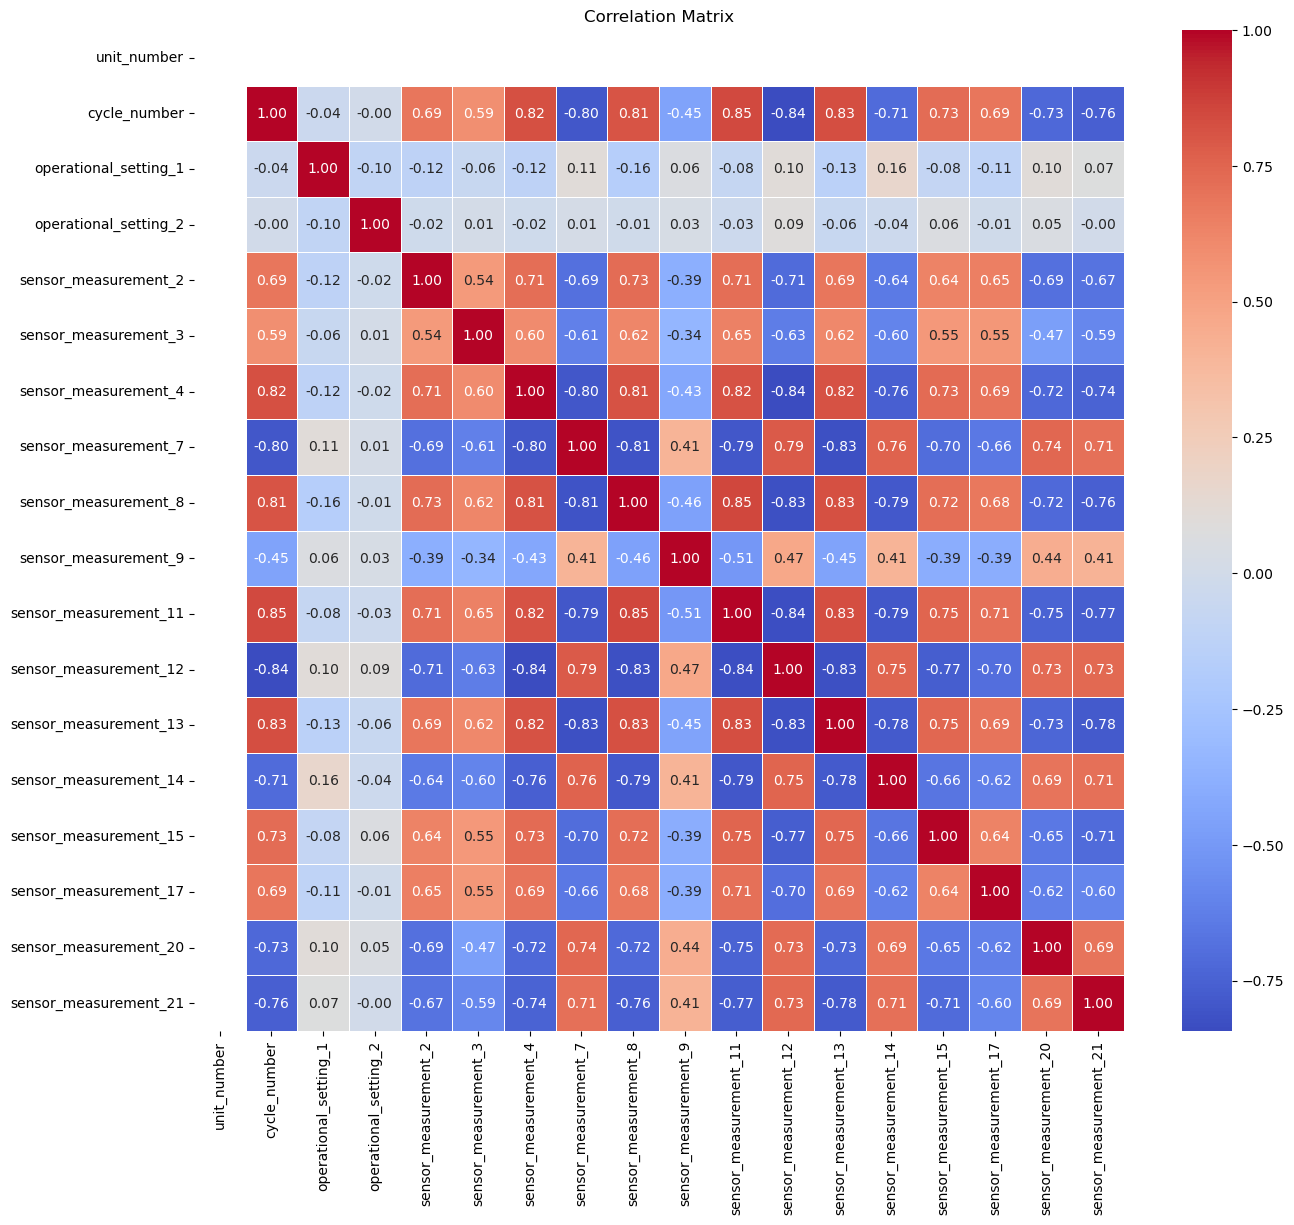

In [16]:
# Compute correlation matrix for variables of jet engine 1 
corr_matrix = df[df["unit_number"]==1].corr()

# Make a heat map to represent degree of correlation between features
plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

There are a number of highly correlated features, but I don't feel comfortable removing them outright, since they might be helpful in calculating RUL. Maybe Principle component analysis can be helpful here?

In [18]:
from sklearn import preprocessing

In [29]:
# Initialize the StandardScaler
scaler = preprocessing.StandardScaler()

# Fit and transform all columns
scaled_values = scaler.fit_transform(df)

# Create a new DataFrame with the scaled values, preserving column names
df_scaled = pd.DataFrame(scaled_values, columns=df.columns)

df_scaled.head()

unit_number  cycle_number  operational_setting_1  operational_setting_2  \
0    -1.728251     -1.550782               0.872688              -1.031809   
1    -1.728251     -1.536264              -1.961847               1.015632   
2    -1.728251     -1.521745               0.324068              -0.008089   
3    -1.728251     -1.507226              -0.864608              -0.690569   
4    -1.728251     -1.492708              -1.961847              -0.349329   

   sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0             -1.061914              0.211517             -0.643769   
1             -0.661928             -0.413162             -0.525996   
2             -0.661928             -1.261291             -0.784873   
3             -0.621929             -1.251505             -0.301562   
4             -1.161910             -0.987280             -1.173744   

   sensor_measurement_7  sensor_measurement_8  sensor_measurement_9  \
0              0.431987             -0.798104             -0.958853   
1              1.008216             -0.234605             -0.557178   
2              1.222889              0.188020             -0.713863   
3              0.714452             -0.516354             -0.457098   
4              1.471459             -1.079853             -0.704806   

   sensor_measurement_11  sensor_measurement_12  sensor_measurement_13  \
0              -0.191592               1.174890              -0.363698   
1              -1.015293               1.364708              -0.919895   
2              -1.539467               1.961276              -0.224649   
3              -0.977852               1.052865              -0.780846   
4              -1.427144               0.361388              -0.919895   

   sensor_measurement_14  sensor_measurement_15  sensor_measurement_17  \
0              -0.642843              -0.275877              -0.781740   
1              -0.551630              -0.649163              -2.073113   
2              -0.520177              -1.971664              -0.781740   
3              -0.521750              -0.339869              -0.136054   
4              -0.571550              -0.835807              -1.427426   

   sensor_measurement_20  sensor_measurement_21  
0               1.016613               1.236993  
1               0.739971               0.503486  
2               0.352671               0.777858  
3               0.463328               1.059621  
4               0.905956               0.713191

In [23]:
# # Initialize the StandardScaler
# scaler = preprocessing.StandardScaler()

# # Fit and transform all columns
# scaled_values = scaler.fit_transform(long_short_living_units)

# # Create a new DataFrame with the scaled values, preserving column names
# long_short_living_units_scaled = pd.DataFrame(scaled_values, columns=long_short_living_units.columns)

# long_short_living_units_scaled.head()

# Assuming your DataFrame is named 'df' and the column to exclude is 'excluded_column'
df_numerical = long_short_living_units.loc[:, long_short_living_units.columns != 'unit_number']

# Initialize the StandardScaler
scaler = preprocessing.StandardScaler()

# Fit and transform the selected columns
long_short_living_units[df_numerical.columns] = scaler.fit_transform(df_numerical)
long_short_living_units.head()

/Users/chiral/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/chiral/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/chiral/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/var/folders/qj/3zmdfhnn4bxgc68lbfycnlt40000gn/T/ipykernel_4977/600233019.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_short_living_units[df_numerical.columns] = scaler.fit_tran

unit_number  cycle_number  operational_setting_1  operational_setting_2  \
7509           39     -1.425319              -0.199249              -0.823800   
7510           39     -1.415812              -2.763858               0.515046   
7511           39     -1.406306               0.287142              -0.154377   
7512           39     -1.396800              -1.746858               1.519180   
7513           39     -1.387294               1.702099               0.515046   

      operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
7509                    0.0                   0.0             -0.062634   
7510                    0.0                   0.0             -0.288753   
7511                    0.0                   0.0             -1.008223   
7512                    0.0                   0.0             -0.597097   
7513                    0.0                   0.0             -0.905442   

      sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
7509              0.225058             -0.054867                   0.0  ...   
7510             -0.883905             -0.286691                   0.0  ...   
7511             -0.883905             -0.345512                   0.0  ...   
7512             -0.584920             -0.605018                   0.0  ...   
7513             -0.733507             -0.195576                   0.0  ...   

      sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  \
7509              -0.093378              -0.034824                    0.0   
7510              -0.992332              -0.507444                    0.0   
7511              -1.323721              -0.881143                    0.0   
7512              -1.339795               0.371849                    0.0   
7513              -1.007170               0.393831                    0.0   

      sensor_measurement_17  sensor_measurement_18  sensor_measurement_19  \
7509              -0.907609                    0.0                    0.0   
7510               1.206790                    0.0                    0.0   
7511               0.501990                    0.0                    0.0   
7512               0.501990                    0.0                    0.0   
7513               0.501990                    0.0                    0.0   

      sensor_measurement_20  sensor_measurement_21  sensor_measurement_22  \
7509               0.643196               0.142708                    NaN   
7510               0.163674               1.764749                    NaN   
7511              -0.375789              -0.129427                    NaN   
7512               0.163674               0.966944                    NaN   
7513              -0.375789               0.525459                    NaN   

      sensor_measurement_23  
7509                    NaN  
7510                    NaN  
7511                    NaN  
7512                    NaN  
7513                    NaN  

[5 rows x 28 columns]

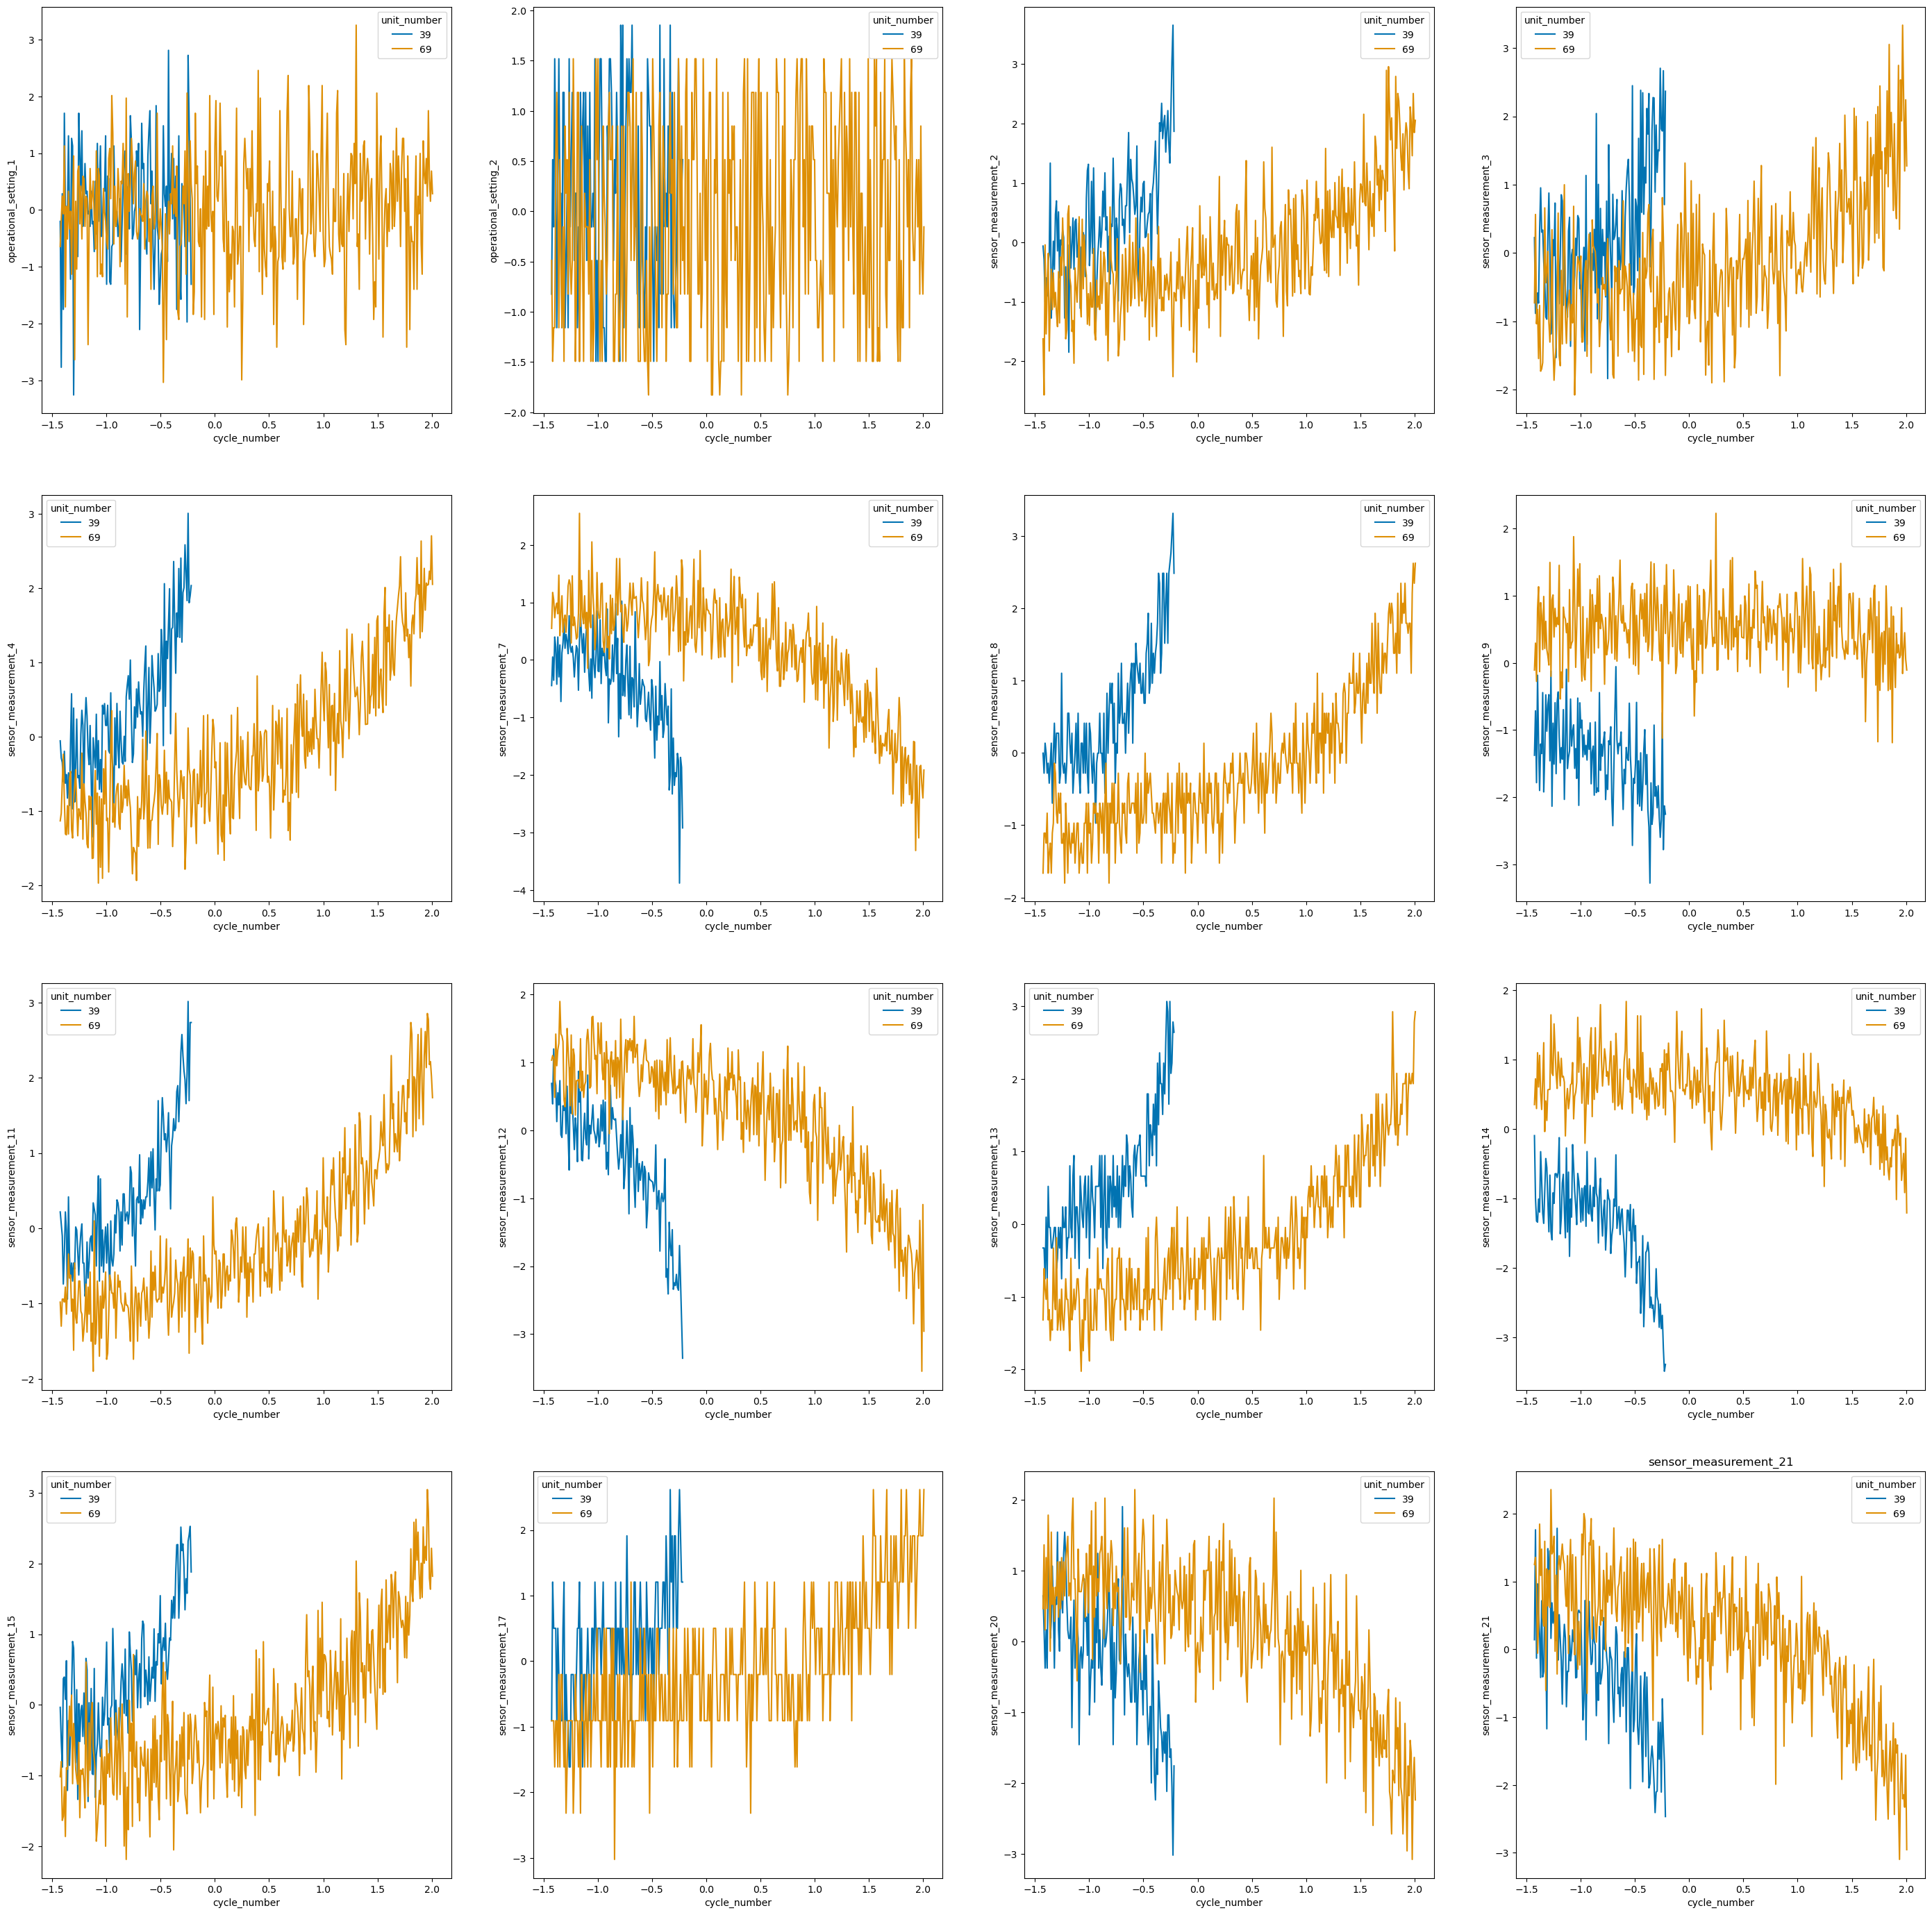

In [28]:
fig, axes = plt.subplots(4, 4, figsize=(35, 35))
# fig.suptitle("Longest vs Shortest living engine")
for var, ax in zip(list(df.columns)[2:], axes.flat):
    # print(var)
    sns.lineplot(data = long_short_living_units, x = "cycle_number", y = var, hue=long_short_living_units["unit_number"], 
                 palette="colorblind",
                 ax=ax
                )
    plt.title(var)